# Importando os dados

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

dataset = pd.read_csv("./base-desafio/insurance.csv")

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Exploração dos dados

In [124]:
dataset.shape

(1338, 7)

In [125]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Não temos dados nulos

Existem 3 variáveis do tipo texto:
- Gênero(sex)
- Fumante (smoker)
- Região(region)

Análise de quantas opções existem em cada variável de texto

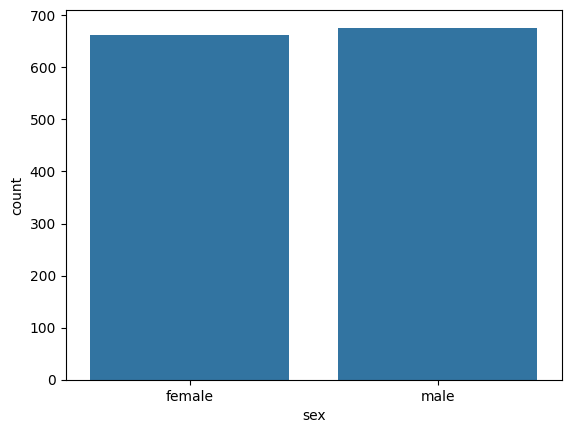

In [127]:
sns.countplot(x="sex", data=dataset)
plt.show()


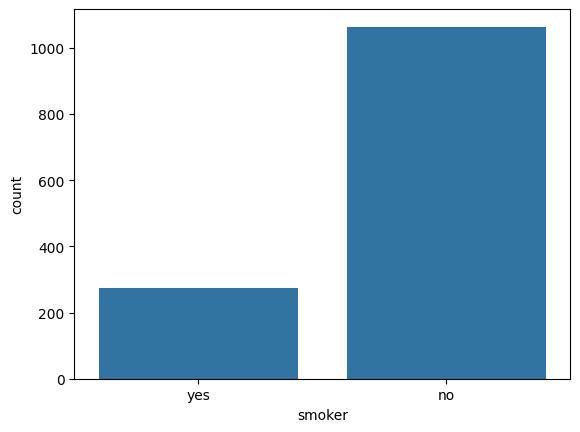

In [92]:
sns.countplot(x="smoker", data=dataset)
plt.show()

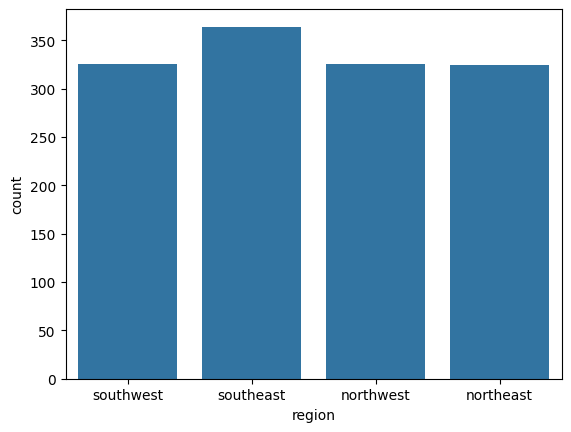

In [93]:
sns.countplot(x="region", data=dataset)
plt.show()

In [94]:
dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Avaliação dados numéricos

In [95]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


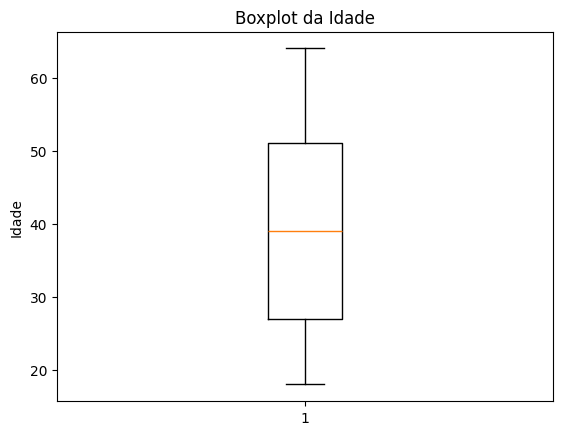

Idade mínima:  18
Idade máxima:  64


In [96]:
plt.boxplot(dataset["age"]) 
plt.title("Boxplot da Idade")
plt.ylabel("Idade")
plt.show()
print("Idade mínima: ", dataset["age"].min())
print("Idade máxima: ", dataset["age"].max())

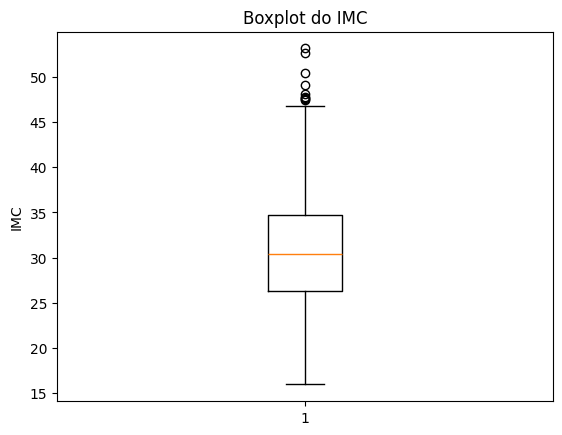

IMC mínimo:  15.96
IMC máximo:  53.13


In [97]:
plt.boxplot(dataset["bmi"])
plt.title("Boxplot do IMC")
plt.ylabel("IMC")
plt.show()
print("IMC mínimo: ", dataset["bmi"].min())
print("IMC máximo: ", dataset["bmi"].max())

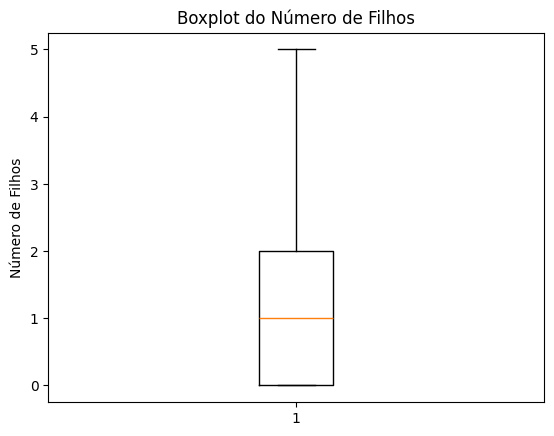

Número mínimo de filhos:  0
Número máximo de filhos:  5


In [98]:
plt.boxplot(dataset["children"])
plt.title("Boxplot do Número de Filhos")
plt.ylabel("Número de Filhos")
plt.show()
print("Número mínimo de filhos: ", dataset["children"].min())
print("Número máximo de filhos: ", dataset["children"].max())

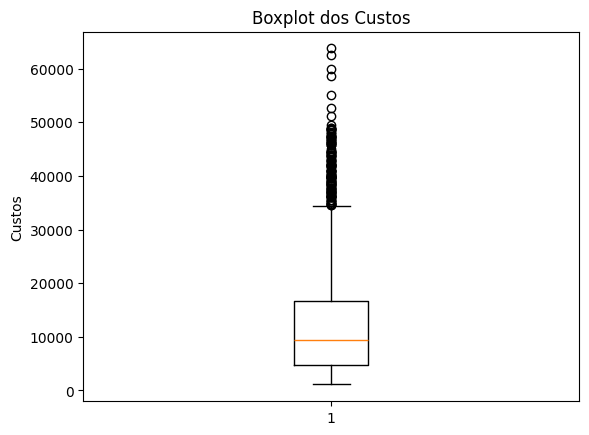

Custos mínimos:  1121.8739
Custos máximos:  63770.42801


In [99]:
plt.boxplot(dataset["charges"])
plt.title("Boxplot dos Custos")
plt.ylabel("Custos")
plt.show()
print("Custos mínimos: ", dataset["charges"].min())
print("Custos máximos: ", dataset["charges"].max())

#### Considerações observadas sobre os dados

- Não há muita diferença entre gêneros (sex).
- A maioria das pessoas são não fumantes(smoker).
- A distribuição de clientes por região(region) é bem equilibrada.
- A idade(age) mínima é de 18 anos, ou seja, contemplamos apenas maior de idade.
- A idade média é de 39 anos, o que está próximo da "meia-idade".
- O valor médio do imc (bmi) é de 30, o que indica que temos uma quantidade considerável de pessoas partindo da obesidade.
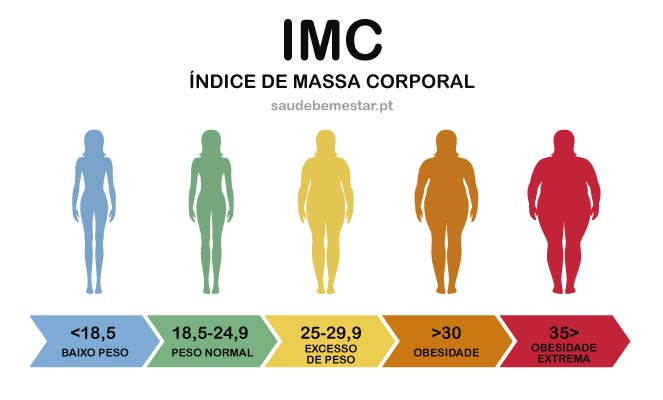
- É possível notar a desproporção entre as variáves idade(age), imc(bmi) e crianças(children).
- Temos uma quantidade significativa de outliers nos custos(charges)

### Criando categorias de imc(bmi)

<Axes: >

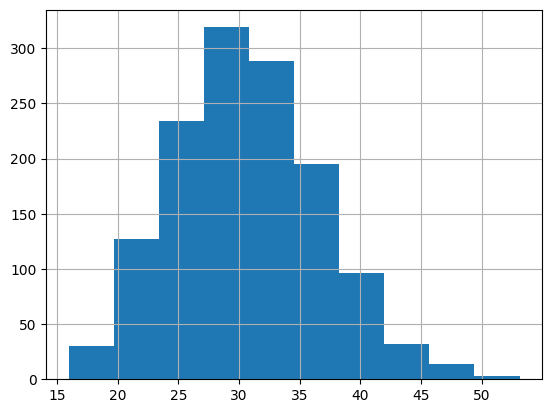

In [100]:
dataset['bmi'].hist()

In [128]:
np.random.seed(42)

dataset['bmi_cat'] = pd.to_numeric(dataset['bmi'], errors='coerce')
dataset['bmi_cat'] = np.ceil(dataset['bmi']/1.5)
dataset['bmi_cat'].where(dataset['bmi'] < 6, 6.0, inplace=True) # pegamos o valor de 6 pois o desvio padrão é de 6.

dataset['bmi_cat'] = pd.cut(dataset['bmi'], bins=[0, 20, 25, 30, 35, np.inf], labels=[1, 2, 3, 4, 5])

C:\Users\carol\AppData\Local\Temp\ipykernel_11652\4090709024.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['bmi_cat'].where(dataset['bmi'] < 6, 6.0, inplace=True) # pegamos o valor de 6 pois o desvio padrão é de 6.


In [129]:
dataset['bmi_cat'].value_counts()

bmi_cat
4    389
3    386
5    316
2    206
1     41
Name: count, dtype: int64

<Axes: >

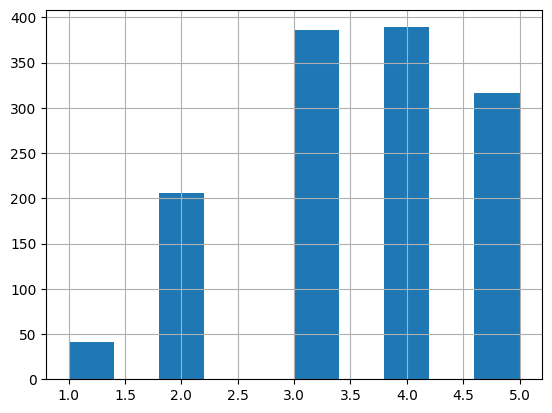

In [130]:
dataset['bmi_cat'].hist()

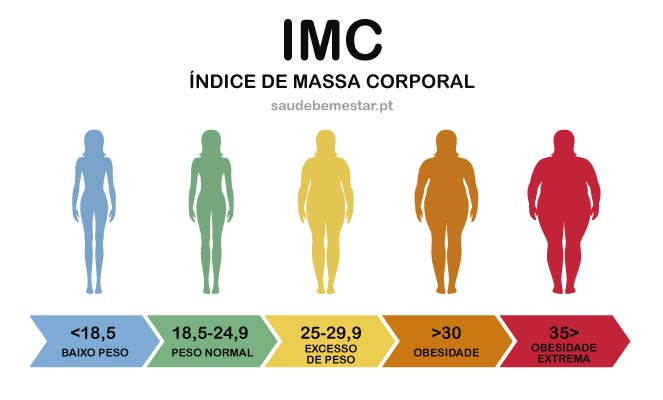

Aqui podemos ver que a maior representação de pessoas da base possuem o imc(bmi) a partir de 'excesso de peso'.
A partir disso, vamos avaliar amostragem com base  na categoria de imc:

In [131]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["bmi_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [132]:
print("test",strat_test_set["bmi_cat"].value_counts() / len(strat_test_set))
print("train",strat_train_set["bmi_cat"].value_counts() / len(strat_train_set))
print("total",dataset["bmi_cat"].value_counts() / len(dataset))

test bmi_cat
3    0.291045
4    0.291045
5    0.235075
2    0.152985
1    0.029851
Name: count, dtype: float64
train bmi_cat
4    0.290654
3    0.287850
5    0.236449
2    0.154206
1    0.030841
Name: count, dtype: float64
total bmi_cat
4    0.290732
3    0.288490
5    0.236173
2    0.153961
1    0.030643
Name: count, dtype: float64


In [133]:
#Remoção do bmi_cat da base de treino e teste
for set_ in (strat_train_set, strat_test_set):
    set_.drop("bmi_cat", axis=1, inplace=True)

# Correlação dos dados

### Conversão das variáveis de texto para número

In [134]:
insurance_strat = strat_train_set.copy()

label_encoder = LabelEncoder()
insurance_strat['sex'] = label_encoder.fit_transform(insurance_strat['sex'])
insurance_strat['smoker'] = label_encoder.fit_transform(insurance_strat['smoker'])
insurance_strat['region'] = label_encoder.fit_transform(insurance_strat['region'])
insurance_strat.head()



,age,sex,bmi,children,smoker,region,charges
1120,23,0,31.40,0,1,3,34166.2730
1079,63,1,33.66,3,0,2,15161.5344
239,44,1,38.06,1,0,2,7152.6714
417,36,0,22.60,2,1,3,18608.2620
934,32,1,37.18,2,0,2,4673.3922


### Analisando custos de seguro

charges     1.000000
smoker      0.786487
age         0.297258
bmi         0.206319
children    0.080918
sex         0.041061
region      0.003316
Name: charges, dtype: float64


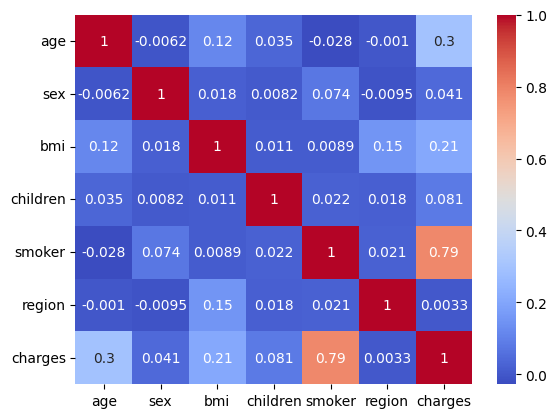

In [135]:
corr_matrix = insurance_strat.corr()
print(corr_matrix["charges"].sort_values(ascending=False))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

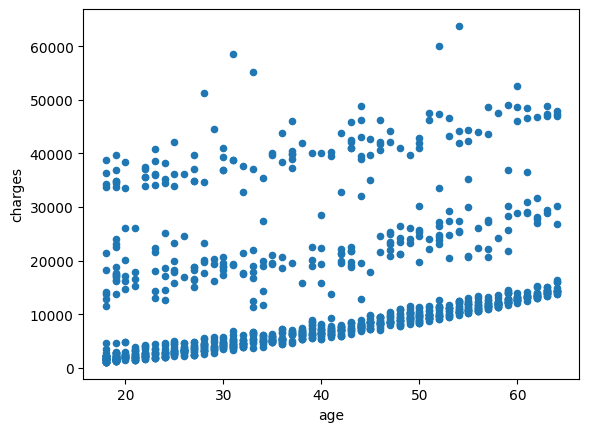

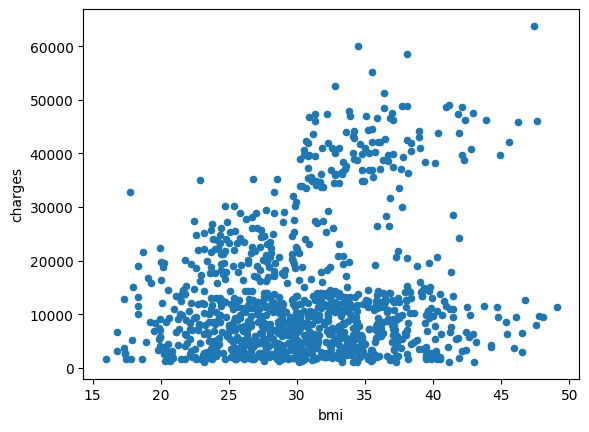

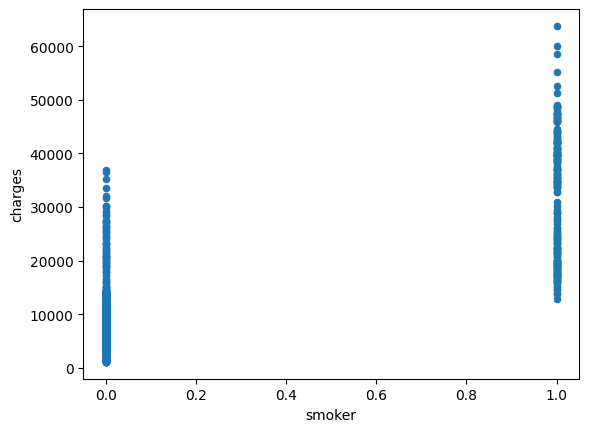

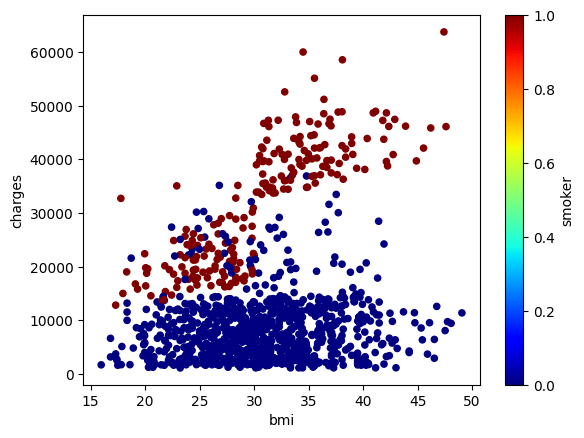

In [136]:
insurance_strat.plot(kind="scatter", x="age", y="charges")
insurance_strat.plot(kind="scatter", x="bmi", y="charges")
insurance_strat.plot(kind="scatter", x="smoker", y="charges")
insurance_strat.plot(kind="scatter", x="bmi", y="charges", c="smoker", cmap=plt.get_cmap("jet"), colorbar=True)

No top 3 de correlação temos o fumante(smoker), idade(age) e imc(bmi). Apesar da correlação ser maior com a questão da pessoa ser fumante ou não, aqui trabalharemos com hipótese de que pessoas com imc a partir de 25 e/ou fumantes são as que pagam mais no seguro,  além do fato de que a idade também influenciar no custo pago, conforme visto na correlação.

## Padronização dos dados

### Separação dos dados em treino e teste antes do escalonamento

In [139]:
insurance = insurance_strat.drop("charges", axis=1)
insurance = insurance.drop(columns=["sex", "region", "children"])
insurance_labels = strat_train_set["charges"].copy()

insurance

,age,bmi,smoker
1120,23,31.400,1
1079,63,33.660,0
239,44,38.060,0
417,36,22.600,1
934,32,37.180,0
...,...,...,...
1008,25,24.985,0
1226,38,16.815,0
873,43,30.100,0
210,20,33.000,0


### Padronização

In [140]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

insurance_prepared_scaled = num_pipeline.fit_transform(insurance)


In [141]:

column_names = ['age', 'bmi','smoker']

insurance_df_scaled = pd.DataFrame(data=insurance_prepared_scaled, columns=column_names)

insurance_df_scaled.head()

,age,bmi,smoker
0,-1.158538,0.124948,1.988392
1,1.687601,0.498794,-0.502919
2,0.335685,1.226637,-0.502919
3,-0.233543,-1.330738,1.988392
4,-0.518157,1.081068,-0.502919


# Escolhendo o modelo

## Regressão Linear

In [142]:
model = LinearRegression()
model.fit(insurance_prepared_scaled,insurance_labels)

LinearRegression()

In [143]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = insurance.iloc[:30]
some_labels = insurance_labels.iloc[:30]

some_data_prepared = num_pipeline.transform(some_data)

predictions = model.predict(insurance_prepared_scaled)

print("Predictions:", model.predict(some_data_prepared))

Predictions: [28204.11279413 15457.32331089 12017.62997793 28667.46104329
  8650.63236512 12757.05264778 10478.09214976 10611.48035837
 10053.67291728  9886.76614844 10917.96427191  3162.81335605
 11330.35107398  6567.71336264 10757.18319054  2545.77308729
 25945.45610711 17565.08565385  5915.32023239 10991.57714269
 14802.94018346  3853.66841519  5121.26751294 13078.7875314
  5345.46333594  4659.10158261 10185.84960836  8817.04284747
  7631.01660922  8194.28073041]


Comparando com os valores reais:

In [144]:
print("Labels:", list(some_labels))

Labels: [34166.273, 15161.5344, 7152.6714, 18608.262, 4673.3922, 10564.8845, 8968.33, 6666.243, 8277.523, 10577.087, 7265.7025, 1639.5631, 9869.8102, 5253.524, 22192.43711, 1253.936, 17085.2676, 14901.5167, 3943.5954, 8334.45755, 36910.60803, 2261.5688, 4260.744, 11938.25595, 2855.43755, 3756.6216, 12029.2867, 10107.2206, 9991.03765, 3935.1799]


### Avaliando o modelo

#### Gráfico de previsões e valores reais

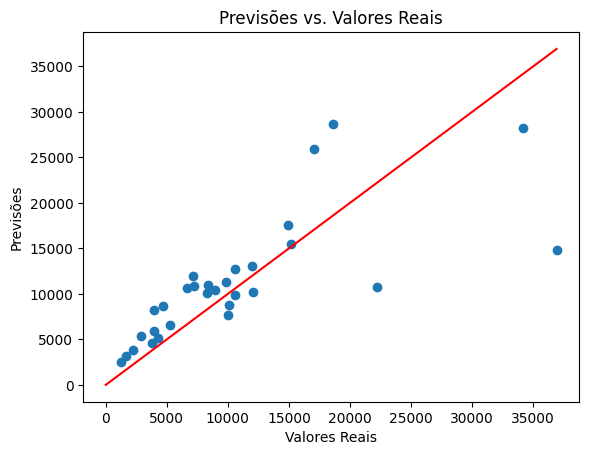

In [145]:
plt.scatter(some_labels, predictions[:len(some_labels)])
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.plot([0, max(some_labels)], [0, max(some_labels)], color='red')
plt.show()

#### Análise estatística

In [147]:
import statsmodels.api as sm

insurance_df_scaled['Intercepto'] = 1

X = insurance_df_scaled[['age', 'bmi','smoker']].copy().reset_index(drop=True)
Y = insurance_labels.copy().reset_index(drop=True)

modelo = sm.OLS(Y, X).fit()

print(modelo.summary())

insurance_predictions = model.predict(insurance_prepared_scaled)
mse = mean_squared_error(insurance_labels, insurance_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(insurance_labels, insurance_predictions)
r2 = r2_score(insurance_labels, insurance_predictions)
def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape
  
mape_result = calculate_mape(insurance_labels, insurance_predictions)

print(mse,"%") # Porcentagem de erro entre previsto e real
print("RMSE R$:", rmse) # Total de valor absoluto de desvio
print("MAE R$:", mae) # Média de valor absoluto de desvio
print(f"O r² é: {r2*100:.2f}%") # Porcentagem de variação explicada
print(f"O MAPE é: {mape_result:.2f}%") # Porcentagem de erro médio absoluto

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.337
Method:                 Least Squares   F-statistic:                              182.5
Date:                Sun, 27 Oct 2024   Prob (F-statistic):                    1.68e-95
Time:                        14:43:06   Log-Likelihood:                         -11771.
No. Observations:                1070   AIC:                                  2.355e+04
Df Residuals:                    1067   BIC:                                  2.356e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Com um MAPE de 43,64% e um r² de 74,71% podemos concluir que o modelo não está chegando próximo dos valores reais. Sendo assim, necessário avaliar outro modelo.

### Decision Tree Regressor

In [153]:
model_dtr = DecisionTreeRegressor(max_depth=7)
model_dtr.fit(insurance_prepared_scaled, insurance_labels)

DecisionTreeRegressor(max_depth=7)

In [154]:
some_data_dtr = insurance.iloc[:30]
some_labels_dtr = insurance_labels.iloc[:30]
some_data_prepared_dtr = num_pipeline.transform(some_data_dtr)
predictions_dtr = model_dtr.predict(some_data_prepared_dtr)

print("Predictions:", model_dtr.predict(some_data_prepared))

Predictions: [34772.07231429 14505.95147867  8498.479386   19907.27441087
  4241.99672692 10090.59616667  9396.814175    8347.41459308
 12399.11026955 13002.06177355  7362.37139638  3808.45235128
 13002.06177355  5909.91285753 13002.06177355  3808.45235128
 17405.98865571 14505.95147867  5909.91285753 10463.30562261
 22317.441818    3808.45235128  5909.91285753 13002.06177355
  5909.91285753  4173.3729625  13002.06177355  9572.623075
 13002.06177355  5890.73230225]


In [155]:
print("Labels:", list(some_labels_dtr))

Labels: [34166.273, 15161.5344, 7152.6714, 18608.262, 4673.3922, 10564.8845, 8968.33, 6666.243, 8277.523, 10577.087, 7265.7025, 1639.5631, 9869.8102, 5253.524, 22192.43711, 1253.936, 17085.2676, 14901.5167, 3943.5954, 8334.45755, 36910.60803, 2261.5688, 4260.744, 11938.25595, 2855.43755, 3756.6216, 12029.2867, 10107.2206, 9991.03765, 3935.1799]


### Avaliando o modelo

#### Gráfico de previsões e valores reais

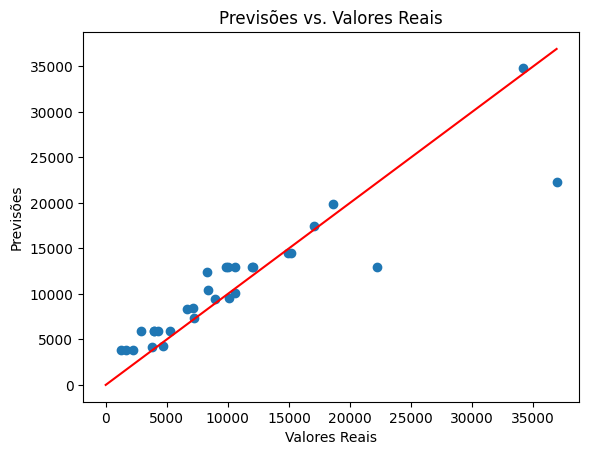

In [156]:
plt.scatter(some_labels, predictions_dtr[:len(some_labels)])
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Previsões vs. Valores Reais')
plt.plot([0, max(some_labels)], [0, max(some_labels)], color='red')
plt.show()

#### Análise estatística

In [157]:
insurance_predictions_dtr = model_dtr.predict(insurance_prepared_scaled)
mse_dtr = mean_squared_error(insurance_labels, insurance_predictions_dtr)
rmse_dtr = np.sqrt(mse_dtr)
mae_dtr = mean_absolute_error(insurance_labels, insurance_predictions_dtr)
r2_dtr = r2_score(insurance_labels, insurance_predictions_dtr)
mape_result_dtr = calculate_mape(insurance_labels, insurance_predictions_dtr)

print(mse_dtr,"%") # Porcentagem de erro entre previsto e real
print("RMSE R$:", rmse_dtr) # Total de valor absoluto de desvio
print("MAE R$:", mae_dtr) # Média de valor absoluto de desvio
print(f"O r² é: {r2_dtr*100:.2f}%") # Porcentagem de variação explicada
print(f"O MAPE é: {mape_result_dtr:.2f}%") # Porcentagem de erro médio absoluto

12392892.577844834 %
RMSE R$: 3520.3540415482125
MAE R$: 1789.7911261175989
O r² é: 91.42%
O MAPE é: 24.94%


# Relatório

In [158]:
report = f"""
Relatório de Análise e Modelagem de Previsão de Custos Médicos

Exploração de Dados:
- Visualização das primeiras linhas do dataframe
{dataset.head()}

- Análise estatística descritiva
{dataset.describe()}

Pré-processamento de Dados:
- Tratamento de valores ausentes: Não foi necessário
- Conversão de variáveis categóricas: Utilizou-se Label Encoding para as colunas:
  ```markdown
  - sex
  - smoker
  - region
  ```
- Normalização de todas as variáveis: Utilizou-se StandardScaler após a divisão dos dados

Modelagem:
- Técnicas avaliadas: Regressão Linear e Decision Tree Regressor
- Técnica escolhida como mais eficiente: Decision Tree Regressor
- Divisão do conjunto de dados: 80% treinamento e 20% teste

Treinamento e Avaliação do Modelo:
- Mean Squared Error: {mse_dtr}
- R-squared: {r2_dtr}
- Mean Absolute Error: {mae_dtr}
- Mean Absolute Percentage Error: {mape_result_dtr}

Gráficos e Visualizações:
- Distribuições das variáveis
- Análise de correlação
- Gráfico de Previsões vs. Valores Reais
"""

print(report)


Relatório de Análise e Modelagem de Previsão de Custos Médicos

Exploração de Dados:
- Visualização das primeiras linhas do dataframe
   age     sex     bmi  children smoker     region      charges bmi_cat
0   19  female  27.900         0    yes  southwest  16884.92400       3
1   18    male  33.770         1     no  southeast   1725.55230       4
2   28    male  33.000         3     no  southeast   4449.46200       4
3   33    male  22.705         0     no  northwest  21984.47061       2
4   32    male  28.880         0     no  northwest   3866.85520       3

- Análise estatística descritiva
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000 